## Imports and Loading Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('SuicideBD dataset.csv')

In [3]:
print("Data entries:" + str(len(df)))
df.head()

Data entries:759


,sl,full_name,age_group,age,gender,profession_group,religion,hometown,latitude,longitude,...,feels_like,temp_min,temp_max,air_pressure,air_humidity,wind_speed,wind_deg,clouds_sky,weather_main,weather_description
0,217,Sumon,Youth,27,Male,NaN,Muslim,Bogura,24.848078,89.372963,...,304.26,299.06,299.06,1005,87,0.53,288,70,Rain,moderate rain
1,362,arman,Teen,13,Male,Worker,muslim,dhaka,23.810332,90.412518,...,303.41,299.15,299.15,1006,88,2.10,160,90,Haze,haze
2,399,abdur rahman,Youth,30,Male,Null,muslim,chittagong,22.356851,91.783182,...,303.16,299.54,299.54,1005,87,3.18,143,100,Clouds,overcast clouds
3,417,saddam,Teen,20,Male,Null,muslim,pirojpur,22.584105,89.972013,...,305.57,300.64,300.64,1003,88,2.42,162,100,Rain,light rain
4,568,Eiyar Hossen,Middle-aged,35,Male,Day labourer,Muslim,"BoroLouho Ghar, Akhaura, Maniyondo, Brahmanbari",23.961576,91.106527,...,305.30,301.15,301.15,1006,83,3.10,180,75,Haze,haze


## Data Cleaning

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sl                   759 non-null    int64  
 1   full_name            754 non-null    object 
 2   age_group            682 non-null    object 
 3   age                  650 non-null    object 
 4   gender               759 non-null    object 
 5   profession_group     612 non-null    object 
 6   religion             734 non-null    object 
 7   hometown             759 non-null    object 
 8   latitude             759 non-null    float64
 9   longitude            759 non-null    float64
 10  reason               643 non-null    object 
 11  reason_description   570 non-null    object 
 12  time                 615 non-null    object 
 13  method               734 non-null    object 
 14  data_source          759 non-null    object 
 15  suicide_date         759 non-null    obj

**In the above table, we find that important indicators like suicide_date and age are not in the desired data types. We need to convert them to *datetime* and *integer* data types for convenience of analysis**

In [215]:
#converting suicide_date to datetime object
df['suicide_date'] = pd.to_datetime(df['suicide_date'],dayfirst=True)

In [216]:
#before converting the age we have to address one row containing 'Null' string
df[df['age'] == 'Null']

,sl,full_name,age_group,age,gender,profession_group,religion,hometown,latitude,longitude,...,feels_like,temp_min,temp_max,air_pressure,air_humidity,wind_speed,wind_deg,clouds_sky,weather_main,weather_description
351,703,Sukhi Begum,NaN,Null,Female,NaN,Muslim,"Asondipara, Shreebordi, Mirpur",23.822349,90.36542,...,305.61,301.15,301.15,1007,74,1.06,178,40,Haze,haze


In [217]:
#Excluding that row with Null value for age
df = df[df['age'] != 'Null']
#dropping missing age data
df = df.dropna(subset='age')

#converting age to int type
df['age'] = df['age'].astype('int')

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 0 to 758
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   sl                   649 non-null    int64         
 1   full_name            644 non-null    object        
 2   age_group            649 non-null    object        
 3   age                  649 non-null    int64         
 4   gender               649 non-null    object        
 5   profession_group     513 non-null    object        
 6   religion             630 non-null    object        
 7   hometown             649 non-null    object        
 8   latitude             649 non-null    float64       
 9   longitude            649 non-null    float64       
 10  reason               551 non-null    object        
 11  reason_description   483 non-null    object        
 12  time                 538 non-null    object        
 13  method               631 non-null  

**The age and suicide_date rows are now in the desired data types.<br>Additionally, we can convert the temperature from Kelvin to Celcius**

In [219]:
df['temperature_c'] = df['temperature']-273

**There are lot of overlapping and typos in the categories of reason and method of suicide. Since they are important indicators, we need to clean them for best results. <br><br>Here, we use tools from the Fuzz library to cluster them into correct categories.**

In [220]:
df['reason'].value_counts()

Family issue                            125
Null                                     68
Mental issue                             65
Domestic violence                        62
Relationship Problem                     26
Relationship problem                     25
Family Issue                             25
Physical issue                           24
Marital issue                            23
Harassment                               20
Poverty                                  18
Educational Failure                      14
Violence                                 11
Fails                                     7
Addiction                                 6
False Accusation                          5
Rape                                      5
Mental Issue                              4
False accusation                          3
Financial Failure - Loan                  3
Financial Failure - Gambling              3
Physical Issue                            2
Relatiohship problem            

In [221]:
from thefuzz import fuzz
from thefuzz import process

In [222]:
#A value_counts list of the reason column were generated and 
#manually cleaned to narrow down the categories
reason_cat = ['Harassment', 'Relatiohship problem', 'Marital affair',
       'Family issue', 'Financial Failure - Loan', 'Financial Failure - Gambling',
       'Humiliation', 'Rape', 'Poverty', 'Violence', 'Mental issue',
       'Physical issue', 'Relationship problem','Fails',
       'Domestic violence', 'False accusation', 'Educational Failure',
       'Addiction', 'Null']

In [223]:
for types in reason_cat:# Find potential matches in states with typoes    
    matches = process.extract(types, df['reason'], limit = df.shape[0])
    # For each potential match match
    for potential_match in matches:
        # If high similarity score (Also known as WRatio in the Fuzz library)
        if potential_match[1] >= 95:
            # Replace typo with correct category          
            df.loc[df['reason'] == potential_match[0], 'reason'] = types

In [224]:
#After further grouping
df['reason'].value_counts()

Family issue                            150
Mental issue                             69
Null                                     68
Domestic violence                        62
Relationship problem                     53
Physical issue                           26
Marital issue                            23
Harassment                               20
Poverty                                  19
Educational Failure                      14
Violence                                 11
False accusation                          8
Fails                                     7
Addiction                                 6
Rape                                      5
Financial Failure - Loan                  3
Financial Failure - Gambling              3
Voilence                                  2
Family issue or relationship problem      1
Violence and mental issue                 1
Name: reason, dtype: int64

In [225]:
df['method'].value_counts()

hanging                          304
Hanging                          159
Taking poison                     80
Taking pesticide                  20
Taking toxic tablet               17
Under the wheels of the train     12
consumed rat poison                7
Jumping from the roof              7
Cutting his throat                 6
Drinking harpic                    3
firing himself                     3
Jumping from a moving train        2
poison and hanging                 2
kerosine firing herself            2
sleeping pills                     1
Electric Shock                     1
jumping from bridge                1
Taking sleeping pill               1
strangulating                      1
by pushing injection               1
belt                               1
Name: method, dtype: int64

In [226]:
#Repeating the same process for method of comitting suicide

method_cat = ['Hanging', 'Stabbing in the neck', 'Taking poison',
       'Taking pesticide', 'Jumping from the roof', 'Jumping under the train',
       'Jumping from a moving train', 'Taking toxic tablet', 'Cutting throat',
       'Taking sleeping pill', 'Drinking harpic', 'Strangulation',
       'Rat killer tablet', 'Pushing injection', 'Firing himself', 'Kerosine fire',
       'Jumping from bridge', 'Electric Shock']

In [227]:
for types in method_cat: #Find potential matches in states with typoes    
    matches = process.extract(types, df['method'], limit = df.shape[0])
    # For each potential match match
    for potential_match in matches:
        # If high similarity score
        if potential_match[1] >= 90:
            # Replace typo with correct category          
            df.loc[df['method'] == potential_match[0], 'method'] = types

In [228]:
df['method'].value_counts()

Hanging                          465
Taking poison                     80
Taking pesticide                  20
Taking toxic tablet               17
Under the wheels of the train     12
Jumping from the roof              7
consumed rat poison                7
Cutting throat                     6
Firing himself                     3
Drinking harpic                    3
Jumping from a moving train        2
kerosine firing herself            2
sleeping pills                     1
Electric Shock                     1
Jumping from bridge                1
Taking sleeping pill               1
Strangulation                      1
Pushing injection                  1
belt                               1
Name: method, dtype: int64

<br>
<br>

## Drawing Insights from Visualizations
### Mental Issues as a cause of suicide


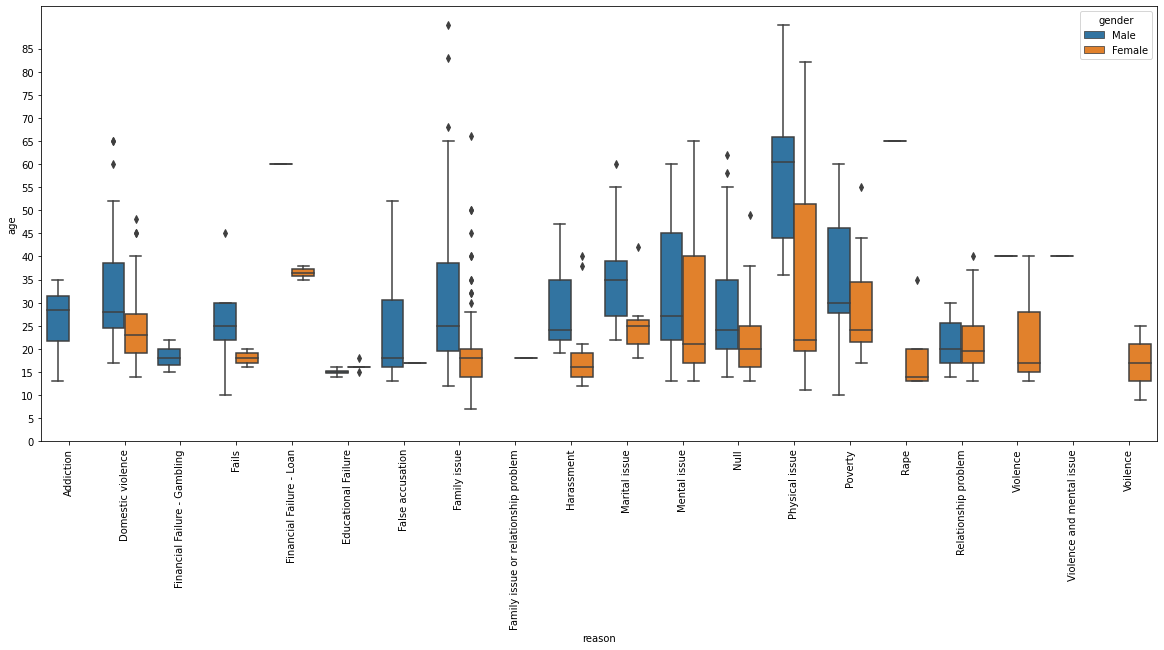

In [229]:
plt.figure(figsize=(20,8))
sns.boxplot(y='age',x='reason',hue='gender',data=df)
plt.yticks(range(0,90,5))
plt.xticks(rotation=90);

**Interestingly, for a major cause for suicide like 'relationship issue', the median ages for both Female and Male are very similar but for a different cause like 'mental issue' the median ages for male and female are different.<br><br>Let's take a look at their central tendencies**

In [232]:
df[df['reason'].isin(['Relationship problem','Mental issue'])].groupby(['reason','gender'])['age'].agg(['mean','median','min','max','std'])


mean  median  min  max        std
reason               gender                                        
Mental issue         Female  28.791667    21.0   13   65  14.755925
                     Male    32.466667    27.0   13   60  13.950562
Relationship problem Female  21.807692    19.5   13   40   7.042836
                     Male    21.222222    20.0   14   30   4.725816

## Hypothesis Testing
### Mental Issues as a cause of suicide


From the above groupby table, we can see that indeed, the mean age for male and female are different for suicide caused by mental issues. However, in the real world, it could very likely be the case that the mean age is the same for both males and females.
<br><br><br>
**Let us hypothesize that males and females who commit suicide due to mental issues is different.<br>
*H0: The mean age of males and females who commit suicide due to mental issues is the same.<br>
Ha: The mean age of males who commit suicide due to mental issues is higher than females.***<br><br>
We will be doing a two-tailed t-test at 95% confidence level

25

In [231]:
from scipy.stats import ttest_ind

#Loading the ages of Males and Females
males_age = df[(df['gender'] == 'Male') & (df['reason'] == 'Mental issue')]['age']
females_age = df[(df['gender'] == 'Female') & (df['reason'] == 'Mental issue')]['age']

#Copying the mean and standard deviation of the two genders
#from the above table and pasting it here
males_mean, females_mean = 32.47, 28.79
males_std, females_std = 13.95, 14.76

# Calculate the t-statistic and p-value
t_stat, p_val = ttest_ind(males_age, females_age)

# Print the results
print(f"Male mean age: {males_mean}, Female mean age: {females_mean}")
print(f"Male std: {males_std}, Female std: {females_std}")
print(f"t-statistic: {t_stat}, p-value: {p_val}")

# Interpret the results
alpha = 0.05  # 95% confidence level
if p_val < alpha:
    print("p-value is less than alpha, so we reject the null hypothesis.")
else:
    print("p-value is greater than alpha, so we fail to reject the null hypothesis.")

Male mean age: 32.47, Female mean age: 28.79
Male std: 13.95, Female std: 14.76
t-statistic: 1.0215829086323436, p-value: 0.3106529491610067
p-value is greater than alpha, so we fail to reject the null hypothesis.


In [237]:
#same thing but using z-test
import math
from scipy.stats import norm

# sample statistics
n = 759
x_bar_male = 32.47
x_bar_female = 28.79
s_male = 13.95
s_female = 14.76

# calculate z-score
se_diff = math.sqrt((s_male**2 / n) + (s_female**2 / n))
z = (x_bar_male - x_bar_female) / se_diff

# calculate p-value
p_value = 1 - norm.cdf(abs(z))

# check if p-value is less than alpha (0.05)
if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")
    
# print z-score and p-value
print("z-score: ", z)
print("p-value: ", p_value)


Reject null hypothesis
z-score:  4.9920363064474085
p-value:  2.9873010254366505e-07


#### Conclusion: From the hypothesis testing done on the dataset that we are working on, we fail to reject the null hypothesis that the mean age for people who commit suicide from mental issues is same for both Males and Females. 

#### But performing the z-score, which is more appropriate, we find a p-value less than 0.05, therefore, we reject the null hypothesis

In [233]:
#Example of t-test
import scipy.stats as stats

# suppose we have a t-score of 2.5 and degrees of freedom (df) of 20
t_score = 23.58
df = 25

# calculate the two-tailed p-value using cumulative distribution function (cdf)
p_value = stats.t.sf(abs(t_score), df) * 2

print("t-score:", t_score)
print("degrees of freedom:", df)
print("p-value:", p_value)


t-score: 23.58
degrees of freedom: 25
p-value: 1.3469559732644945e-18


In [3]:
sf = pd.read_csv('SuicideBD dataset.csv')

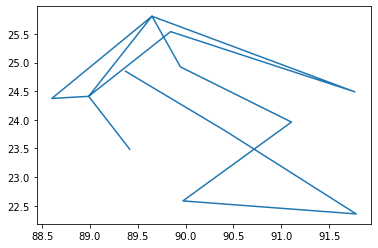

In [11]:
x = sf['longitude'][0:15]
y = sf['latitude'][0:15]

plt.plot(x,y)

<AxesSubplot:>

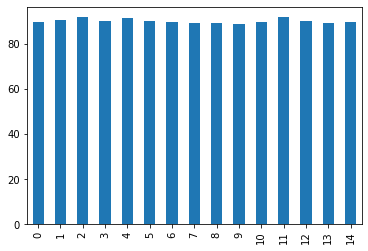

In [14]:
x.plot(kind='bar')

In [21]:
sf.iloc[:20,:8]

,sl,full_name,age_group,age,gender,profession_group,religion,hometown
0,217,Sumon,Youth,27,Male,NaN,Muslim,Bogura
1,362,arman,Teen,13,Male,Worker,muslim,dhaka
2,399,abdur rahman,Youth,30,Male,Null,muslim,chittagong
3,417,saddam,Teen,20,Male,Null,muslim,pirojpur
4,568,Eiyar Hossen,Middle-aged,35,Male,Day labourer,Muslim,"BoroLouho Ghar, Akhaura, Maniyondo, Brahmanbari"
5,598,Mahfuzul Haque,Middle-aged,32,Male,NaN,Muslim,"Munshinangla, Melandoho, Jamalpur"
6,266,ratan mia,Youth,28,Male,Null,muslim,kurigram
7,273,Abu Said Lelin,Middle-aged,35,Male,Service holder,muslim,bogra
8,279,runa,Middle-aged,40,Female,Null,muslim,natore
9,288,Marufa Aktar,Teen,19,Female,Null,muslim,rajshahi


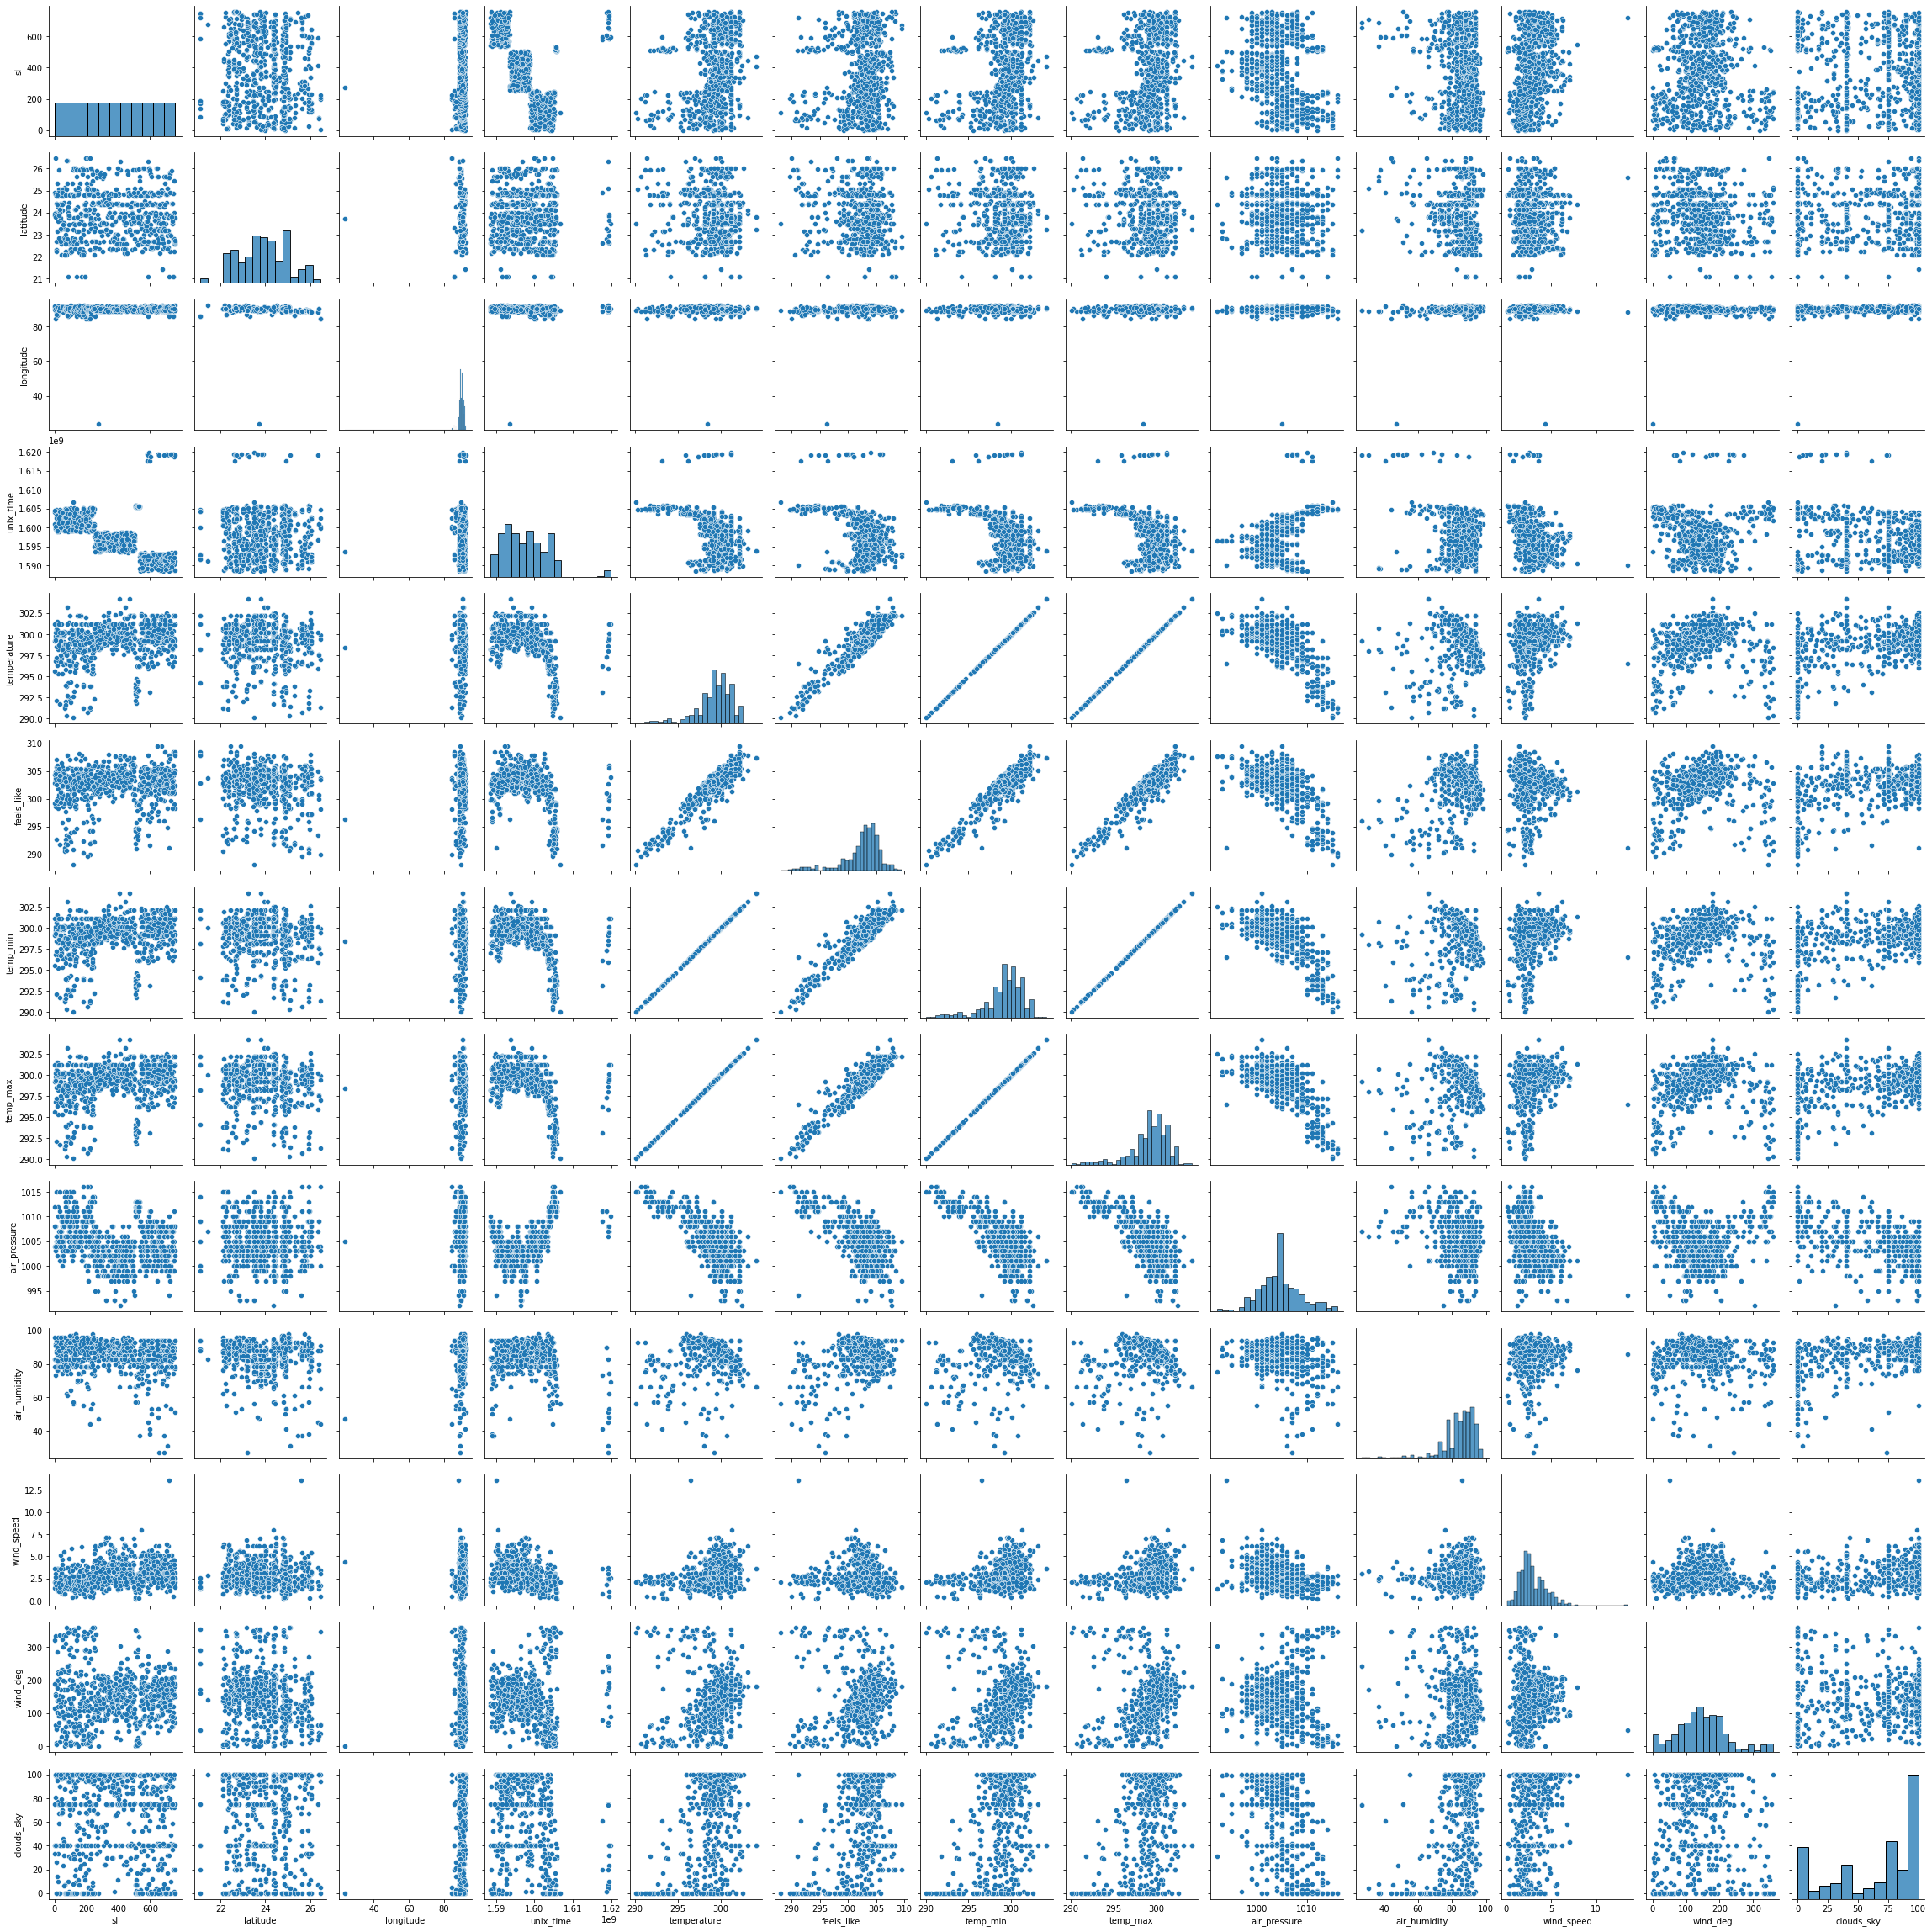

In [4]:
sns.pairplot(df)

In [15]:
df.reason.value_counts(normalize=True)

Family issue                            0.228616
Mental issue                            0.115086
Null                                    0.115086
Domestic violence                       0.111975
Relationship Problem                    0.046656
Relationship problem                    0.045101
Harassment                              0.041991
Family Issue                            0.040435
Marital issue                           0.038880
Physical issue                          0.037325
Educational Failure                     0.035770
Poverty                                 0.032659
Violence                                0.027994
Fails                                   0.012442
Mental Issue                            0.010886
Addiction                               0.009331
False Accusation                        0.009331
Rape                                    0.007776
False accusation                        0.006221
Financial Failure - Gambling            0.006221
Relatiohship problem